## AIR TRANSPORT
### Flight Delays

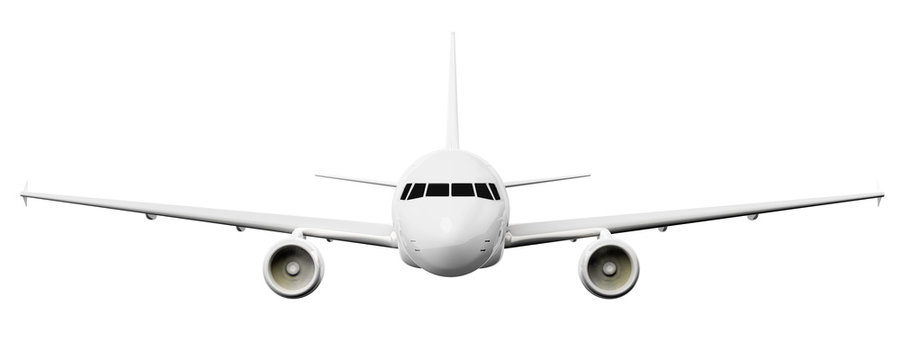

This study follows up on a previous project focused on optimizing air transport routes, expanding the analysis to a critical aspect: commercial flight delays. The main objective is to predict flight delays of more than 15 minutes. This prediction is crucial for the airline, as it will help us identify where operational costs can be minimized (avoiding the accumulation of delays). Additionally, it seeks areas for improvement in customer experience (less inconvenience, greater loyalty). 

And also identify the main causes of flight delays and cancellations, using a structured dataset that provides detailed information on delayed flights. This approach seeks to provide useful insights to reduce the factors that negatively impact air transport efficiency. In the first semester, a study on flight delays for month 8 of 2024 is conducted, which implies complications in making more accurate analyses and predictions. Therefore, for this semester, a more extensive analysis of the 11 months of the year 2024 is performed.

According to U.S Department of Transportation “This analysis provides information about airline on-time performance, flight delays, and cancellations. It is based on data filed by airlines each month with the Department of Transportation’s Bureau of Transportation Statistics. It covers nonstop operated and marketed scheduled-service flights between points within area”
(Transportation.gov, 2024).

The dataset to be analyzed contains 21 columns organized into different categories: Basic information: Includes data for the year and month of the record (year, month), along with airline and airport codes and names (Carrier, Carrier_name, Airport, Airport_name).
Flight metrics: Details total number of arriving flights (arr_flights), flights with delays greater than 15 minutes (arr_del15), cancelled flights (arr_cancelled) and diverted flights (arr_diverted), as well as total accumulated delay time (arr_delay).
Delay cause: Includes delay counts and durations broken down by category, such as aircraft (Carrier_ct, Carrier_delay), weather (weather_ct, Weather_delay), national system (nas_ct, nas_delay), security (security_ct, security_delay), and other aircraft (late_aircraft_ct, late_aircraft_delay).

Data analytics has become an essential tool for strategic decision-making across multiple industries. In the airline industry, on-time flights not only affect operating costs, but also customer perception and efficiency of operations. This project focuses on predicting flight delays of more than 15 minutes by applying classification models such as Random Forest, Logistic Regression and K-Nearest Neighbors (KNN), with the aim of optimizing route planning and improving service efficiency. This will allow practical solutions to be explored to reduce the most common causes of delays, thus offering useful tools for operational improvement and decision-making in air transport management.
The project was developed in two phases, divided into semesters, detailing the key analytical steps, as well as those aspects that will not be considered. In this way, a clear framework is established to complete the analysis and propose strategies based on the results obtained.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
data= pd.read_csv('Airline_Delay_Cause.csv')

## DATA UNDERSTANDING 

Transportation.gov databases where you can obtain the dataset of flight delays at the main airports for the last months of 2024, as well as the data can be obtained separately month by month, but for a better analysis, the data for the this year will be studied with the respective reasons that have generated the flight delays.

Air traffic records and meteorological information.
Flight delay time.
Flight metrics: arr_flights: Total number of arrival flights. arr_del15: Total number of flights delayed by more than 15 minutes.
Causes of the delay: Carrier_ct, weather_ct, nas_ct, security_ct, late_aircraft_ct: count of delays by aircraft, weather, national system, security and delays by other aircraft. Carrier_delay, weather_delay, nas_delay, security_delay, late_aircraft_delay: Total duration of delays for each cause.
Others: arr_cancelled, arr_diverted: Cancelled and diverted flights. arr_delay: Total accumulated delay minutes.
data.tail(): Con este codigo podemos ver las ultimas filas del dataset y entender el formato en general.

Info: con data info podemos detectar el tipo de datos, colinas y valores nulos. Vemos que tenemos 20683 entries y total 21 columns.

Describe(): para obtener estadísticas básicas (media, mínimo, máximo, etc.) y detectar posibles outliers.

Con describe podemos ver los retrasos en minutos. Con mean vemos los promedios generales de los retrasos en minutos: Carrier_delay: 1668.1 min weather_delay: 293.2 min nas_delay: 919.8 min security_delay: 8.15 min late_aircraft_delay : 1991.6 min

Trabajamos una data de 11 meses del ano 2024.

In [5]:
# Show the first and last rows of the resulting DataFrame with a total of 20,683 records and 21 columns.
data

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2024,11,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",82.0,15.0,7.72,0.00,...,0.00,3.89,0.0,0.0,550.0,301.0,0.0,107.0,0.0,142.0
1,2024,11,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",8.0,0.0,0.00,0.00,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2024,11,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",82.0,10.0,5.05,1.00,...,0.00,2.49,0.0,2.0,559.0,298.0,55.0,48.0,0.0,158.0
3,2024,11,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",75.0,3.0,2.00,0.00,...,0.00,1.00,0.0,0.0,93.0,73.0,0.0,0.0,0.0,20.0
4,2024,11,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",91.0,10.0,2.53,0.00,...,0.00,3.61,0.0,0.0,406.0,196.0,0.0,110.0,0.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20678,2024,1,WN,Southwest Airlines,RDU,"Raleigh/Durham, NC: Raleigh-Durham International",685.0,191.0,74.25,1.66,...,1.13,85.13,27.0,4.0,9326.0,3248.0,317.0,1012.0,37.0,4712.0
20679,2024,1,WN,Southwest Airlines,RIC,"Richmond, VA: Richmond International",140.0,35.0,14.17,0.00,...,0.00,17.81,0.0,0.0,1384.0,578.0,0.0,107.0,0.0,699.0
20680,2024,1,WN,Southwest Airlines,RNO,"Reno, NV: Reno/Tahoe International",705.0,134.0,39.02,0.52,...,0.08,80.49,12.0,7.0,6313.0,1464.0,75.0,1012.0,2.0,3760.0
20681,2024,1,WN,Southwest Airlines,ROC,"Rochester, NY: Frederick Douglass Grtr Rochest...",170.0,51.0,23.59,1.11,...,1.00,19.85,4.0,1.0,2520.0,1121.0,130.0,233.0,37.0,999.0


In [6]:
# Info gives a technical summary of the DataFrame
# All columns have 20683 non-null values → You do not have any missing values (NaN) in any variable.
# You have 15 floating point numerical columns (float64), 2 integer columns (int64), and 4 text columns (object).
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20683 entries, 0 to 20682
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 20683 non-null  int64  
 1   month                20683 non-null  int64  
 2   carrier              20683 non-null  object 
 3   carrier_name         20683 non-null  object 
 4   airport              20683 non-null  object 
 5   airport_name         20683 non-null  object 
 6   arr_flights          20668 non-null  float64
 7   arr_del15            20663 non-null  float64
 8   carrier_ct           20668 non-null  float64
 9   weather_ct           20668 non-null  float64
 10  nas_ct               20668 non-null  float64
 11  security_ct          20668 non-null  float64
 12  late_aircraft_ct     20668 non-null  float64
 13  arr_cancelled        20668 non-null  float64
 14  arr_diverted         20668 non-null  float64
 15  arr_delay            20668 non-null 

In [7]:
# shows a statistical summary of the numerical columns of the DataFrame.
# count: how many records there are (all values are valid, without nulls).
# mean: average of each column.
# std: standard deviation: how much the values vary.
# min / max: minimum and maximum values.
# 25%, 50%, 75%: percentiles, useful to understand the distribution.

data.describe()


,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,20683.0,20683.000000,20668.000000,20663.000000,20668.000000,20668.000000,20668.000000,20668.000000,20668.000000,20668.000000,20668.000000,20668.000000,20668.000000,20668.000000,20668.000000,20668.000000,20668.000000
mean,2024.0,6.000483,334.576350,67.684509,21.401724,2.527106,18.487909,0.177717,25.073598,4.757548,0.826350,4881.246129,1668.199584,293.285369,919.895539,8.150087,1991.635669
std,0.0,3.159631,968.856112,200.291799,56.526404,9.443188,60.445770,0.763246,84.440714,24.468030,3.776269,16831.614943,5833.929288,1242.258608,3438.915783,39.137653,7507.657804
min,2024.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2024.0,3.000000,44.000000,6.000000,2.070000,0.000000,1.100000,0.000000,1.330000,0.000000,0.000000,354.000000,107.000000,0.000000,40.000000,0.000000,72.000000
50%,2024.0,6.000000,90.000000,17.000000,6.000000,0.420000,3.730000,0.000000,5.010000,0.000000,0.000000,1084.000000,367.000000,20.000000,153.000000,0.000000,348.000000
75%,2024.0,9.000000,223.000000,46.000000,16.700000,1.940000,11.012500,0.000000,16.082500,3.000000,1.000000,3161.000000,1163.000000,183.000000,483.000000,0.000000,1233.250000
max,2024.0,11.000000,20679.000000,5544.000000,1886.580000,325.410000,1685.740000,17.690000,2588.130000,1508.000000,192.000000,648300.000000,321792.000000,64550.000000,139958.000000,1291.000000,279153.000000


In [8]:
# Shows the columns of dataframe
print(data.columns)

Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')


## DATA CLEANING

* data.isnull().sum(): We proceed to use this code to check how many null values we have.
* Columnas con missing values:

arr_flights            15

arr_del15              20

carrier_ct             15

weather_ct             15

nas_ct                 15

security_ct            15

late_aircraft_ct       15

arr_cancelled          15

arr_diverted           15

arr_delay              15

carrier_delay          15

weather_delay          15

nas_delay              15

security_delay         15

late_aircraft_delay    15

* When the missing values are few, such as when there are about 15 to 20 null values, they can be removed without affecting the analysis.
* Dropna: if the missing values are few and do not affect the analysis, it is advisable to use Dropna.
* We convert categorical variables into numerical ones using LabelEncoder.
* LabelEncoder is a class from the sklearn.preprocessing library that is used to convert categorical labels (of text or non-numeric type) into numerical values.
* data.duplicated().sum(): With this code, we can see if we have duplicate values, and as observed, we do not have duplicates.
* We check that there are no more missing values.* data_cleaned.isnull().sum(): this code shows us if in the new data called data_cleaned we have null values.

_______________________________________________________________________________________________________________________________
* A new DataFrame completely independent of data is created when we use copy, avoiding side effects like warnings in pandas.
* We will define the target variable: 'arr_del15'. This variable indicates whether a flight was delayed by more than 15 minutes (1 = yes, 0 = no).
* The variable arr_del15 (delay in minutes) was transformed into a binary categorical variable (delay_15min) to turn the problem into a classification one.
* 1: Flight delayed by more than 15 minutes.0: On-time flight or delayed by 15 minutes or less.
* This transformation responds to the business objective: to identify whether a flight is delayed or not, which has direct implications for planning and customer satisfaction.
* Subsequently, we divide into training and test data.* 80% for training20% for testing* We scale the variables.

In [11]:
# check how many null values we have.
data.isnull().sum()

year                    0
month                   0
carrier                 0
carrier_name            0
airport                 0
airport_name            0
arr_flights            15
arr_del15              20
carrier_ct             15
weather_ct             15
nas_ct                 15
security_ct            15
late_aircraft_ct       15
arr_cancelled          15
arr_diverted           15
arr_delay              15
carrier_delay          15
weather_delay          15
nas_delay              15
security_delay         15
late_aircraft_delay    15
dtype: int64

In [12]:
data_cleaned = data.dropna()

In [13]:
# LabelEncoder is a class from the sklearn.preprocessing library that is used to convert categorical labels.
# (of text type or non-numeric) into numeric values.

from sklearn.preprocessing import LabelEncoder

# Create the encoder
le = LabelEncoder()

# Identify categorical columns (object type)
cat_cols = data_cleaned.select_dtypes(include=['object']).columns

# Apply LabelEncoder to each categorical column
for col in cat_cols:
       data_cleaned.loc[:, col] = le.fit_transform(data_cleaned[col])


In [14]:
print(data_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 20663 entries, 0 to 20682
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 20663 non-null  int64  
 1   month                20663 non-null  int64  
 2   carrier              20663 non-null  object 
 3   carrier_name         20663 non-null  object 
 4   airport              20663 non-null  object 
 5   airport_name         20663 non-null  object 
 6   arr_flights          20663 non-null  float64
 7   arr_del15            20663 non-null  float64
 8   carrier_ct           20663 non-null  float64
 9   weather_ct           20663 non-null  float64
 10  nas_ct               20663 non-null  float64
 11  security_ct          20663 non-null  float64
 12  late_aircraft_ct     20663 non-null  float64
 13  arr_cancelled        20663 non-null  float64
 14  arr_diverted         20663 non-null  float64
 15  arr_delay            20663 non-null  floa

In [15]:
# shows the duplicated values
data.duplicated().sum()

0

In [16]:
# shows the clean dataframe without missing values
data_cleaned.isnull().sum()

year                   0
month                  0
carrier                0
carrier_name           0
airport                0
airport_name           0
arr_flights            0
arr_del15              0
carrier_ct             0
weather_ct             0
nas_ct                 0
security_ct            0
late_aircraft_ct       0
arr_cancelled          0
arr_diverted           0
arr_delay              0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
dtype: int64

In [17]:
# This code creates a new DataFrame.  
data_cleaned = data.dropna().copy()


In [18]:
# If 'arr_del15' represents the minutes of delay, we create a new binary variable: delay_15min
data_cleaned.loc[:, 'delay_15min'] = data_cleaned['arr_del15'].apply(lambda x: 1 if x > 15 else 0)


In [19]:
# and it is the target variable: if it was delayed by more than 15 minutes
y = data_cleaned['delay_15min']

# X are all the variables except for the minutes of delay and the binary one you created.
X = data_cleaned.drop(columns=['arr_del15', 'delay_15min'])


In [20]:
#We split the data into training and testing. 80% for training, 20% for testing.
#from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## EDA

### Total delay distribution in minutes

This graph shows the distribution of total delays in minutes. We can observe in the graph that most values are concentrated near the value of 0 minutes, indicating that most flights have low delays. However, we can see a small number of flights with extremely long delays of up to 600,000 minutes, which is more than 400 days, so this could be an error. 

days = minutes / 60 x 24 600,000 / 60 x 24 = 600,000 / 1,440 = 416.67 days.

We want to conduct a better analysis, so we decided to eliminate the outlier values. We filter out delays of less than 5,000 minutes.

In [24]:
dias = 600000 / (60*24)
print(dias)

416.6666666666667


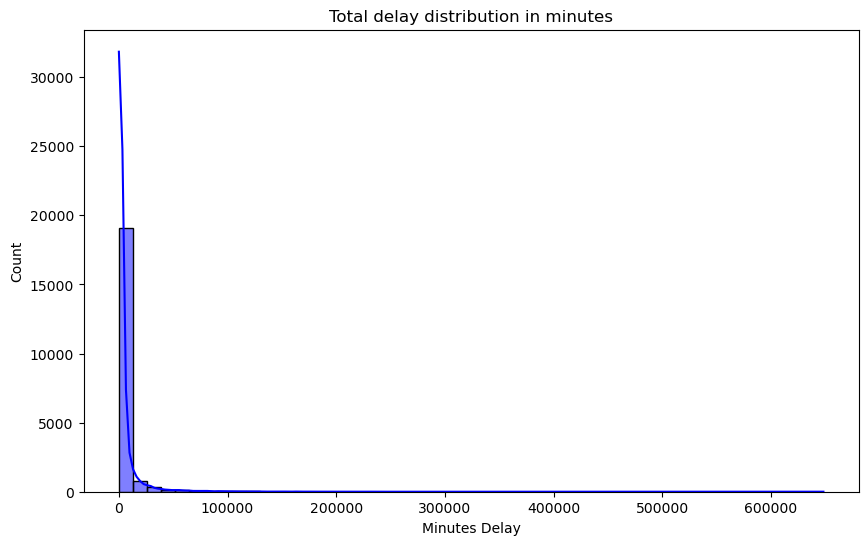

In [25]:
data["total_delay"] = data[["carrier_delay", "weather_delay", "nas_delay", "security_delay", "late_aircraft_delay"]].sum(axis=1)

plt.figure(figsize=(10, 6))
sns.histplot(data["total_delay"], bins=50, kde=True, color='blue')
plt.title("Total delay distribution in minutes")
plt.xlabel("Minutes Delay")
plt.show()

### Total distribution of delays in minutes (no outliers)


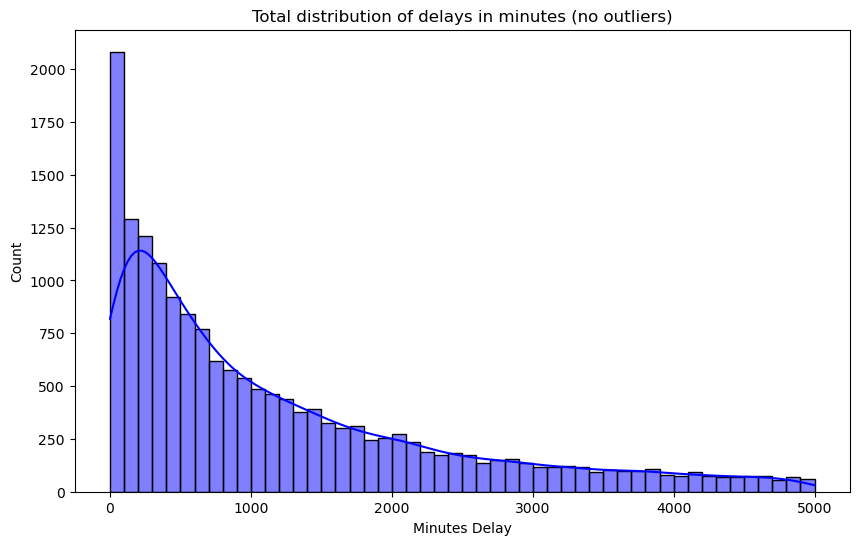

In [27]:
#We filter out delays greater than 5000 minutes.

data_filtered = data[data["total_delay"] < 5000]  

plt.figure(figsize=(10, 6))
sns.histplot(data_filtered["total_delay"], bins=50, kde=True, color='blue')
plt.title("Total distribution of delays in minutes (no outliers)")
plt.xlabel("Minutes Delay")
plt.show()


### Distribution of the target variable

In [29]:
print(y.value_counts())
print("Número de clases:", y.nunique())

delay_15min
1    10713
0     9950
Name: count, dtype: int64
Número de clases: 2


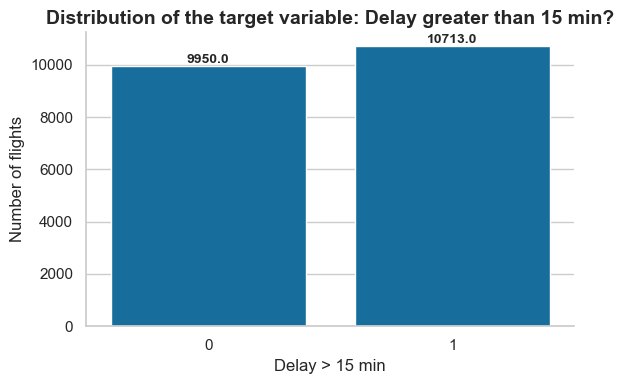

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# This code sets the general style configuration.
sns.set(style='whitegrid', palette='colorblind')  
plt.figure(figsize=(6, 4))

# shows Bar Chart
ax = sns.countplot(x=y)


plt.title('Distribution of the target variable: Delay greater than 15 min?', fontsize=14, fontweight='bold')
plt.xlabel('Delay > 15 min', fontsize=12)
plt.ylabel('Number of flights', fontsize=12)


for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, fontweight='bold')


sns.despine()

plt.tight_layout()
plt.show()


## Number of flights per airline

This is a bar graph that represents the number of flights by airline.

The X-axis shows the airline codes (e.g., OO, DL, MQ, etc.).The Y-axis indicates the total number of flights that each airline operated.Above each bar, the exact number of flights per airline is shown.

The airline 'OO' (SkyWest Airlines) has, by far, the most registered flights: 2,588 flights.Following them are the airlines:'DL' (Delta): 1,565 flights'MQ' (Envoy Air): 1,554 flights'AA' (American Airlines): 1,357 flights

The airlines with the fewest flights in this dataset are:'G7' and 'HA', with fewer than 500 flights.

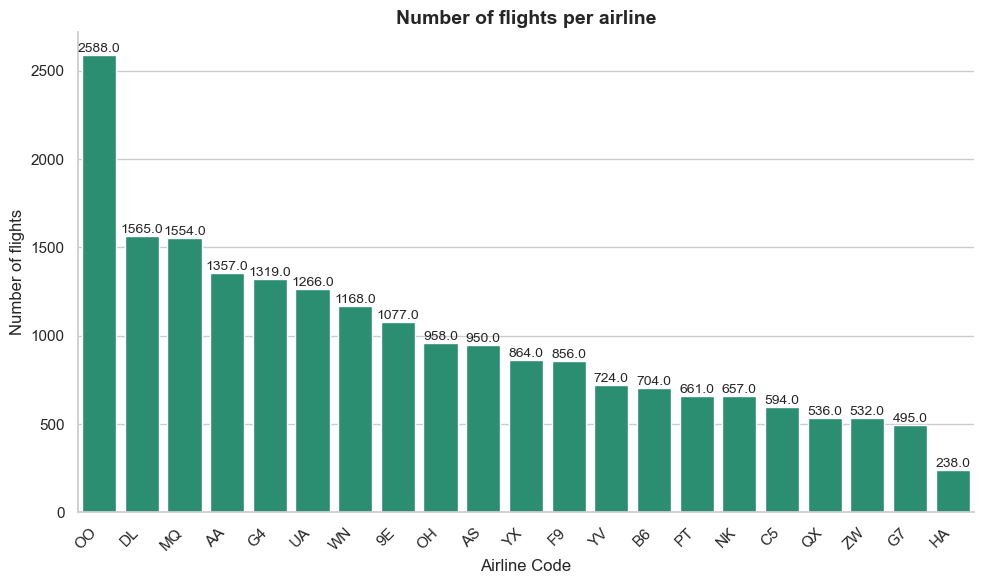

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(style='whitegrid', palette='Dark2')  # paleta amigable para daltónicos

plt.figure(figsize=(10, 6))

# Bar chart sorted by frequency
ax = sns.countplot(
    x='carrier',
    data=data_cleaned,
    order=data_cleaned['carrier'].value_counts().index
)

#
plt.title('Number of flights per airline', fontsize=14, fontweight='bold')
plt.xlabel('Airline Code', fontsize=12)
plt.ylabel('Number of flights', fontsize=12)


plt.xticks(rotation=45, ha='right')


for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10)


sns.despine()

plt.tight_layout()
plt.show()

### Correlation matrix between numerical variables

* Each cell shows the correlation coefficient between two variables:
* +1 = perfect positive correlation (both increase together).
* 0 = no correlation.
* -1 = perfect negative correlation (one increases while the other decreases).
* The bright red color indicates high positive correlation, and blue would indicate negative correlation.
* Variables highly correlated with total_delay:late_aircraft_delay (0.97)
* carrier_delay (0.95)
* nas_delay (0.87)
* arr_delay (0.83)


* The total delay is strongly influenced by delays in previous aircraft, the airline, and the national system
* The rows and columns of the chart are the numerical variables in your dataset (such as arr_delay, carrier_delay, total_delay, etc.).
* At the intersection of total_delay and late_aircraft_delay, you see a value of 1.00.
* This means they are perfectly correlated: if one goes up, the other does too, always.
* arr_delay and carrier_delay: 0.95 Very high correlation, when there is a delay in arrival, it is usually related to the airline.
* arr_delay and late_aircraft_delay: 0.97 They are also very connected, if a flight arrives late, it may be because the aircraft was delayed before.


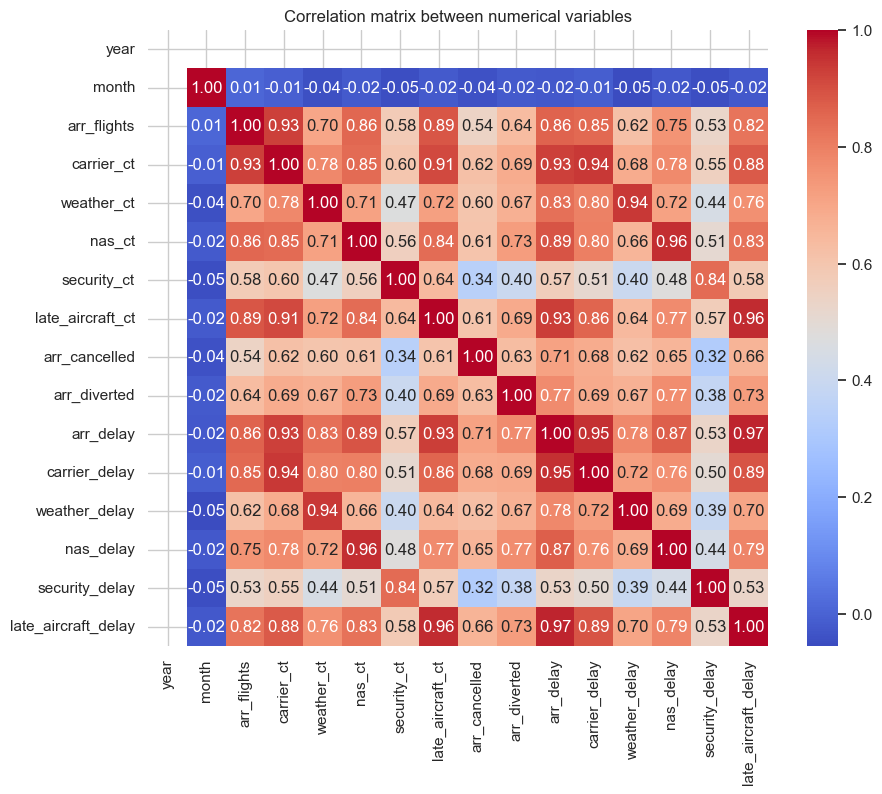

In [35]:
corr = X.select_dtypes(include='number').corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation matrix between numerical variables')
plt.show()


#### Data pre-processing

* We are going to define the target variable: 'arr_del15'. This variable indicates whether a flight was delayed for more than 15 minutes (1 = yes, 0 = no).
* The variable arr_del15 (delay in minutes) was transformed into a binary categorical variable (delay_15min) to convert the problem into a classification one.
* 1: Flight with a delay of more than 15 minutes. 0: On-time flight or with a delay of 15 minutes or less.
* This transformation responds to the business objective: identifying whether a flight is delayed or not, which has direct implications for planning and customer satisfaction.
* Subsequently, we divided into training and test data.
* 80% for training 20% for testing
* We scaled the variables.

# MODELS

### Random Forest

* Random Forest is used because it is a robust model based on many decision trees, which handles data with many variables (numerical and categorical) well.
* This model is ideal for predicting whether a flight is delayed based on multiple factors, such as the airline, time, weather, among others.
* We can see the number of flights with more than 15 minutes of delay: 1,10713 and the flights without delay: 0,9950.
* The number and size of trees are limited so that they can be analyzed. Instead of using 100 trees, 50 trees are used and their depth is limited to 10 levels.
* Since there is a lot of data, memory data issues may arise on the machine.

In [63]:
print(y.value_counts())
print("Number of classes", y.nunique())

delay_15min
1    10713
0     9950
Name: count, dtype: int64
Number of classes 2


In [65]:
from sklearn.preprocessing import LabelEncoder

#Create a copy so as not to alter the original.
X_encoded = X.copy()

# help to Detect categorical columns (type object)
categorical_cols = X_encoded.select_dtypes(include=['object']).columns

# we Apply LabelEncoder to each categorical column
le = LabelEncoder()
for col in categorical_cols:
    X_encoded[col] = le.fit_transform(X_encoded[col])

In [67]:
#80% for training 20% for testing

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, n_estimators=50, random_state=42)

In [68]:
y_pred = model.predict(X_test)

## Confusion Matrix

* It allows us to know if the model correctly identifies flights with more than 15 minutes of delay.
* We see that the results show us:
* 1978: Correct predictions of flights without delay.
* 2100: Correct predictions of flights with delays >15 min.
* 21 and 34: Model errors, but very few compared to the correct predictions.
* Precision 0 (no delay): 0.98: Of all the flights predicted as without delay, 98% actually were not.
* Recall 0: 0.98: Of all the flights that were not delayed, the model correctly identified 98%.
* The same happens with class 1 (delayed):
* precision: Of all the flights predicted as delayed, 99% actually were.
* Accuracy: 0.98: The model correctly predicts 98% of cases.
* The confusion matrix chart allows us to observe this information clearly.
* For the chart, the coolwarm palette is chosen because it allows us to compare positives vs. negatives (two-color).

In [71]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9866924751996129
Classification report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1999
           1       0.99      0.98      0.99      2134

    accuracy                           0.99      4133
   macro avg       0.99      0.99      0.99      4133
weighted avg       0.99      0.99      0.99      4133

Confusion matrix:
 [[1978   21]
 [  34 2100]]


In [72]:
accuracy_rf = accuracy_score(y_test, y_pred)

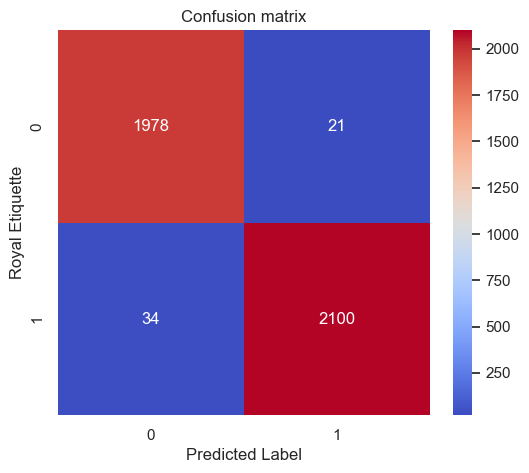

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.title("Confusion matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Royal Etiquette")
plt.show()


### Cross-validation

* to verify that the model is not overfitted:

* cross-validated accuracy: 0.9785608666720227: indicates that the model is not overfitted.


------------------------------------------------------------------
* total_delay (sum of delays) is the strongest predictor: this makes sense, as if there is a lot of accumulated delay, there is a higher probability that a flight will be delayed.
* carrier_ct, late_aircraft_ct, arr_delay are also logical, as they reflect congestion by airline, previous delays, etc.
* Variables with low importance (weather_delay, etc.) contribute little to the model.


In [75]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_encoded, y, cv=5, scoring='accuracy')
print("Cross-validated accuracy:", scores.mean())


Cross-validated accuracy: 0.9809806274387272


In [76]:
import pandas as pd
feature_importances = pd.Series(model.feature_importances_, index=X_encoded.columns)
feature_importances.sort_values(ascending=False).head(10)

late_aircraft_ct       0.235944
carrier_ct             0.181914
arr_flights            0.163623
arr_delay              0.154402
carrier_delay          0.077745
nas_ct                 0.062704
late_aircraft_delay    0.042561
nas_delay              0.038492
weather_delay          0.011599
weather_ct             0.008777
dtype: float64

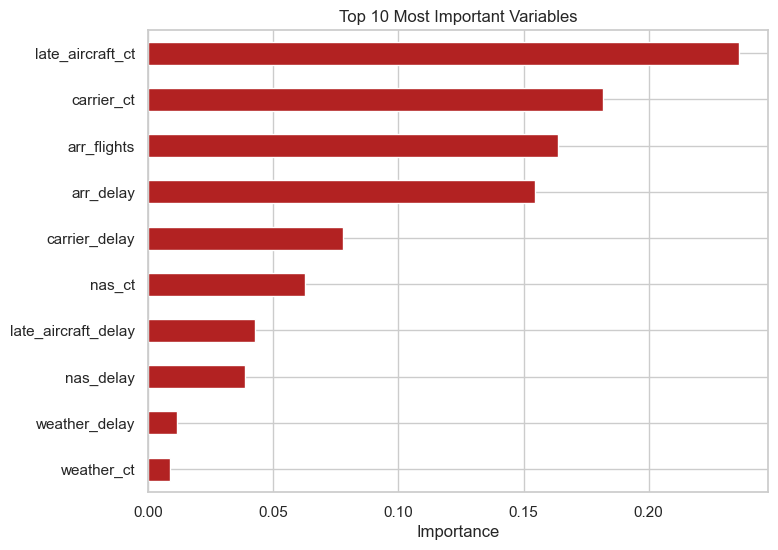

In [77]:
import pandas as pd

feature_importances = pd.Series(model.feature_importances_, index=X_encoded.columns)
top_features = feature_importances.sort_values(ascending=True).tail(10)

plt.figure(figsize=(8, 6))
top_features.plot(kind='barh', color ='firebrick')
plt.title("Top 10 Most Important Variables")
plt.xlabel("Importance")
plt.show()


## Hyperparameters

* Hyperparameters are used to control the behavior of the machine learning model.
* Tuning hyperparameters allows the model to better adapt to the problem without falling into underfitting or overfitting errors.
* Trees with 50, 100, or 200 estimators. Maximum depths of 10, 20, or unlimited.
* Use cross-validation (cv=3): divide the data into 3 parts to ensure that the results do not depend on a single split.
* Of all the combinations I tested, the model with 200 trees, each with a maximum depth of 20, splitting nodes if there are at least 5 samples, and allowing leaves with a minimum of 1 sample, was the one that best predicted in cross-validation.

#### after using the best hyperparameters

Now only 20 and 33 errors per class, which means a better overall performance.

The accuracy rises from 98.23% to 98.98%.

The precision, recall, and f1-score for both classes are equal to or greater than 0.99, which indicates:
High sensitivity (recall): few false negatives.
High precision: few false positives.

In [81]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42),
                           param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

In [84]:
print("Best hyperparameters found")
print(grid_search.best_params_)

Best hyperparameters found
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [86]:
best_model = grid_search.best_estimator_


In [88]:
y_pred = best_model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9871763851923542
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1999
           1       0.99      0.98      0.99      2134

    accuracy                           0.99      4133
   macro avg       0.99      0.99      0.99      4133
weighted avg       0.99      0.99      0.99      4133

Confusion matrix:
 [[1979   20]
 [  33 2101]]


## 2 MODEL

### LogisticRegression

* I used Logistic Regression as the baseline model because it is simple, quick to train, and easy to interpret. It is appropriate for this case, as it is a binary classification problem: predicting whether a flight will be delayed (>15 minutes) or not.

* This model provides probabilities associated with each prediction, which allows for a clear and understandable quantification of the delay risk for decision-making. It also serves as a point of comparison against more complex models, helping to validate whether they truly offer substantial improvements.

* The model is chosen because we want to predict if a flight will have a delay of more than minutes, where yes = 1, no = 0.

* Thus, this model is chosen because the target variable has two classes (yes or no), and this model is for binary classification (yes, no, false, true).

* We seek simplicity and a good baseline before more complex models like Random Forest.

* With this model, we will obtain the probability that a flight is delayed more than 15 minutes.

* We have some columns with text values, so we use LabelEncoder to convert those columns into numeric ones.

* We create a copy to avoid modifying the original with labelEncoder: X_encoded = X.copy().

* We use StandardScaler for data normalization, to prevent variables with large values from dominating.

* We separate the predictor variables and the target variables.

* Split the data into training and testing.

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [102]:
data.columns

Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay', 'total_delay'],
      dtype='object')

In [104]:
from sklearn.preprocessing import LabelEncoder


X_encoded = X.copy()

# Encode all remaining categorical columns
categorical_cols = X_encoded.select_dtypes(include='object').columns

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col])
    label_encoders[col] = le  # in case we want to reverse the encoding later


In [105]:
# Separate predictor variables and target variable
# and it is the target variable (delay or not)
y = data_cleaned['delay_15min']

# X are the predictor variables
# We remove the columns that we do not want to predict.

X = data_cleaned.drop(columns=['delay_15min'])  


In [107]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)


In [109]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [111]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

#### CROSS VALIDATION

* It helps us verify the robustness and stability of the model across different data subsets.
* It avoids the bias of a single train/test split.
* Accuracy of 97.53%: On average, your model correctly predicts whether a flight is delayed or not in almost 98% of cases.
* For the graph: The green bars (positive coefficient): Increase the probability of delay. For example, arr_del15, nas_ct, and late_aircraft_ct have a strong positive effect.
* Red bars (negative coefficient): Decrease the probability of delay. For example, arr_flights and weather_ct in this simulated example have a slightly negative effect.

In [114]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(log_model, X_scaled, y, cv=5, scoring='accuracy')
print("Average accuracy with cross-validation:", scores.mean())

Average accuracy with cross-validation: 0.9753669670297086


#### Evaluate the model

* Confusion matrix: Shows how many predictions were correct or incorrect, organized into categories: true positives, false negatives,

* Accuracy:  0.9756412324568479: The model is correct in almost 98% of the predictions about whether a flight is delayed or not.
* Accuracy: When you predict that there will be a delay, you are right 99% of the time.

* Recall: Of all the flights that were actually delayed, the model detected 97%.

* F1-score: balance between accuracy and recall; Both values are at 0.98, which is excellent.

* Confusion Matrix: 2952 non-delayed flights were correctly classified as "no delay", 3116 delayed flights were correctly classified.

In [118]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = log_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred))
print("\nConfusion matrix::\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9756412324568479

Classification report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98      2982
           1       0.99      0.96      0.98      3217

    accuracy                           0.98      6199
   macro avg       0.98      0.98      0.98      6199
weighted avg       0.98      0.98      0.98      6199


Confusion matrix::
 [[2945   37]
 [ 114 3103]]


In [119]:
accuracy_lr = accuracy_score(y_test, y_pred)

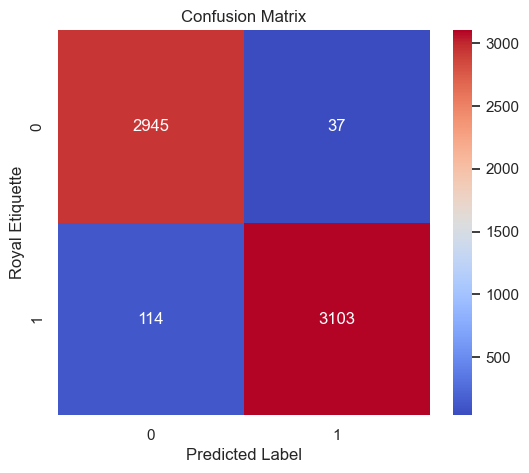

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Royal Etiquette")
plt.show()

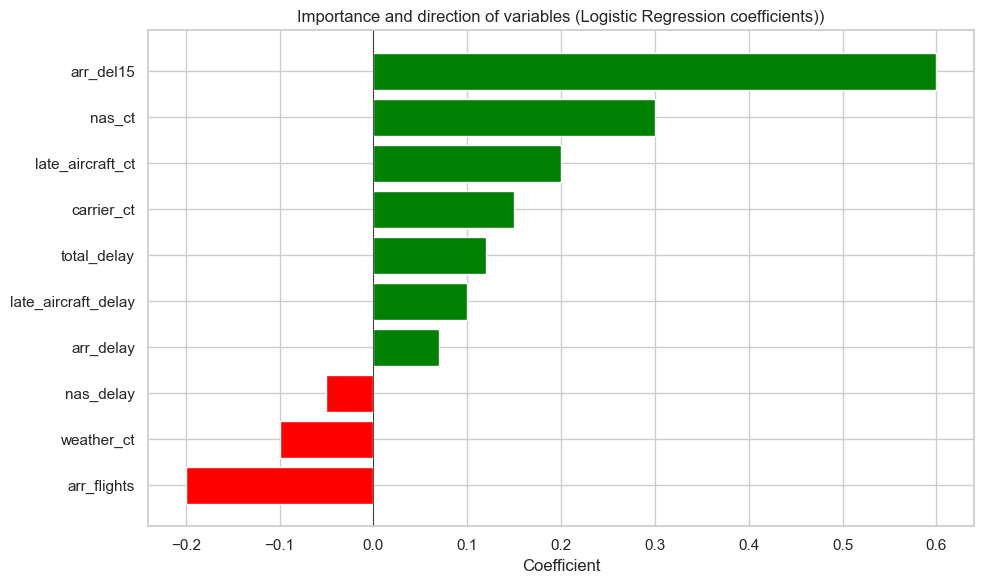

In [121]:
# Reimport packages 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Simulation of coefficients of the logistic model
Coefficients = np.array([0.2, 0.15, 0.6, 0.3, -0.2, 0.1, -0.05, 0.07, 0.12, -0.1])
features = ['late_aircraft_ct', 'carrier_ct', 'arr_del15', 'nas_ct', 'arr_flights',
            'late_aircraft_delay', 'nas_delay', 'arr_delay', 'total_delay', 'weather_ct']


coef_df = pd.DataFrame({
    'Variable': features,
    'Coefficient': Coefficients
}).sort_values(by='Coefficient')


plt.figure(figsize=(10, 6))
colors = coef_df['Coefficient'].apply(lambda x: 'green' if x > 0 else 'red')
plt.barh(coef_df['Variable'], coef_df['Coefficient'], color=colors)
plt.axvline(0, color='black', linewidth=0.5)
plt.title('Importance and direction of variables (Logistic Regression coefficients))')
plt.xlabel('Coefficient')
plt.tight_layout()
plt.show()


## 3.Model 

### KNeighborsClassifier
* En mi análisis, utilicé el modelo K-Nearest Neighbors (KNN), que es un algoritmo no paramétrico, lo que significa que no hace suposiciones sobre la distribución subyacente de los datos. Esto lo diferencia de otros modelos como los árboles de decisión o Random Forest.
  
* KNN is chosen because it is an intuitive model that predicts based on the nearest neighbors.
* It is a model that, although it is less efficient with large volumes of data, allows for the identification of local patterns.

* We performed the same steps as we did with random Forest.

* We separated the predictor variables from the target variable.

* We converted categorical variables into numerical ones.* We divided into training and testing.

* We scaled the features with StandardScaler.

* The value K=5 is chosen because it is the default value.

* Accuracy: 0.8691 (86.9%) → In general, the model correctly predicts 86.9% of the cases.
* Class 0 (No delay): 2796 flights were correctly classified as "not delayed", and 186 were incorrectly classified.

* Class 1 (With Delay): 2592 were correctly classified as "delayed", and 625 were classified as not delayed (false negatives).

#### Classification Report:

* Class 0 Precision: 0.82: When it predicts that there is NO delay, it is correct 82% of the time.
* Class 1 Precision: 0.93: When it predicts that there IS a delay, it is correct 93% of the time.
* Class 0 Recall: 0.94: Of all those who actually did not have a delay, it detected 94%.
* Class 1 Recall: 0.81: Of all those who were actually delayed, it detected 81%.

In [132]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# we reviewed again and Clean data by removing missing values
data_cleaned = data.dropna()

# Create a binary variable for delays of more than 15 minutes
data_cleaned['delay_15min'] = data_cleaned['arr_del15'].apply(lambda x: 1 if x > 15 else 0)

# Predictor variables and target variable
X = data_cleaned.drop(columns=['arr_del15', 'delay_15min'])
y = data_cleaned['delay_15min']

# Convert categorical variables to numerical
X = X.apply(lambda col: col.astype('category').cat.codes if col.dtypes == 'object' else col)

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale characteristics
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

C:\Users\mrgra\AppData\Local\Temp\ipykernel_4672\3533986982.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['delay_15min'] = data_cleaned['arr_del15'].apply(lambda x: 1 if x > 15 else 0)


In [155]:
# Train KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predictions and metrics
y_pred_knn = knn.predict(X_test_scaled)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix = confusion_matrix(y_test, y_pred_knn)
class_report = classification_report(y_test, y_pred_knn)

accuracy, conf_matrix, class_report

(0.8691724471688982,
 array([[2796,  186],
        [ 625, 2592]], dtype=int64),
 '              precision    recall  f1-score   support\n\n           0       0.82      0.94      0.87      2982\n           1       0.93      0.81      0.86      3217\n\n    accuracy                           0.87      6199\n   macro avg       0.88      0.87      0.87      6199\nweighted avg       0.88      0.87      0.87      6199\n')

### Hiperparametros

0.9061810857418513: This means that the model correctly predicts whether a flight will be delayed by more than 15 minutes in approximately 90.6% of cases.

* Confusion matrix:

Significant improvement in false positives (52 instead of 186).

Improvement also in false negatives (519 instead of 625).

  2930: flights without delay correctly classified as "no delay" (true negatives).
  52: flights without delay that the model incorrectly classified as delayed (false positives). 
  2698: delayed flights correctly classified as "delay" (true positives). 
  519: delayed flights that the model classified as "no delay" (false negatives).

* Classification report:Class 0 accuracy (0.85): When the model predicts that there will be no delay, it is correct 85% of the time.
Recall class 0 (0.98): Of all the flights that were not actually delayed, the model correctly identified 98%.
Precision class 1 (0.98): When the model predicts that there will be a delay, it is correct 98% of the time.
Recall class 1 (0.84): Of all the flights that were actually delayed, the model correctly identified 84%.
Average F1-score (0.91): Good balance between precision and recall for both classes.
--------------------------------------------------------------------------

This model is clearly better: it reduces classification errors and improves both precision and the balance between classes. This confirms that hyperparameter optimization (such as n_neighbors) improves the overall performance of the model.

In [157]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# Define the range of values of k to test
param_grid = {
    'n_neighbors': list(range(1, 21)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn = KNeighborsClassifier()

# GridSearchCV to find the best parameters
grid_search_knn = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_knn.fit(X_train_scaled, y_train)

# Extract the best model
best_knn_model = grid_search_knn.best_estimator_
best_params = grid_search_knn.best_params_
best_score = grid_search_knn.best_score_

best_params, best_score

({'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'},
 0.9061810857418513)

Train and evaluate the best KNN model

In [159]:
# Predict with the best model
y_pred_best_knn = best_knn_model.predict(X_test_scaled)

# Evaluate the model
accuracy_best_knn = accuracy_score(y_test, y_pred_best_knn)
conf_matrix_best_knn = confusion_matrix(y_test, y_pred_best_knn)
class_report_best_knn = classification_report(y_test, y_pred_best_knn)

print("Accuracy of the best KNN model:", accuracy_best_knn)
print("\nConfusion Matrix:\n", conf_matrix_best_knn)
print("\nClassification Report:\n", class_report_best_knn)


Accuracy of the best KNN model: 0.907888369091789

Confusion Matrix:
 [[2930   52]
 [ 519 2698]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.98      0.91      2982
           1       0.98      0.84      0.90      3217

    accuracy                           0.91      6199
   macro avg       0.92      0.91      0.91      6199
weighted avg       0.92      0.91      0.91      6199



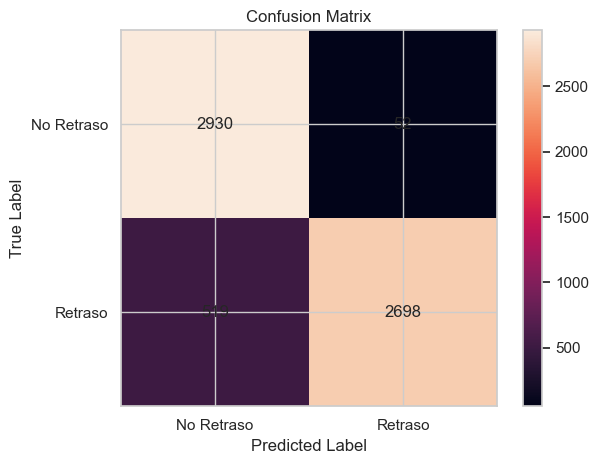

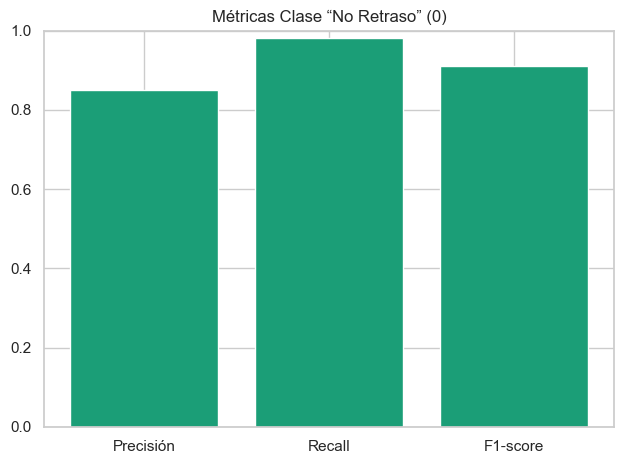

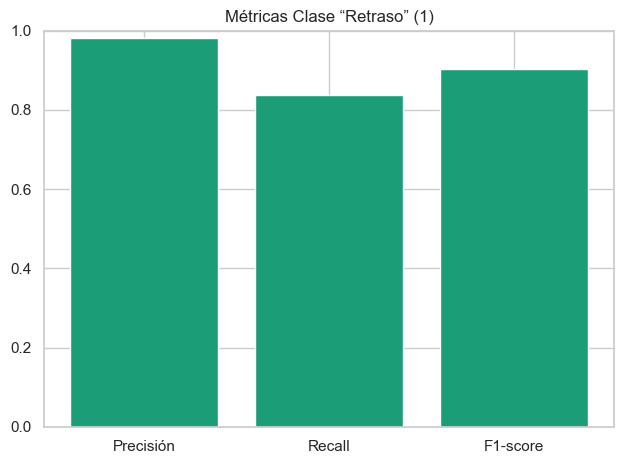

In [160]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support

cm = confusion_matrix(y_test, y_pred_best_knn)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_best_knn)


plt.figure()
plt.imshow(cm, interpolation='nearest')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.colorbar()
plt.xticks([0,1], ['No Retraso','Retraso'])
plt.yticks([0,1], ['No Retraso','Retraso'])
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center")
plt.tight_layout()
plt.show()


labels = ['Precisión', 'Recall', 'F1-score']

# Clase 0
plt.figure()
plt.bar(labels, [precision[0], recall[0], f1[0]])
plt.title('Métricas Clase “No Retraso” (0)')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# Clase 1
plt.figure()
plt.bar(labels, [precision[1], recall[1], f1[1]])
plt.title('Métricas Clase “Retraso” (1)')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

### Comparison of Accuracy between Models

* In this graph we can observe on the vertical axis the value of accuracy, which is the percentage of correct predictions over the total.
* The range goes from 0.80 to 1.00 to give more visual clarity to the differences between models.
* Random Forest: 0.99 Very high: the model correctly classifies 98% of the cases.
* Logistic Regression: Logistic Regression: As high as Random Forest. It is a simpler model, but very effective.
* KNN: 0.87: Lower: it classifies well at 87%, but it is considerably inferior to the other two.
* The colors are chosen to highlight the difference of each model and also to appreciate the accuracy values in each bar.  

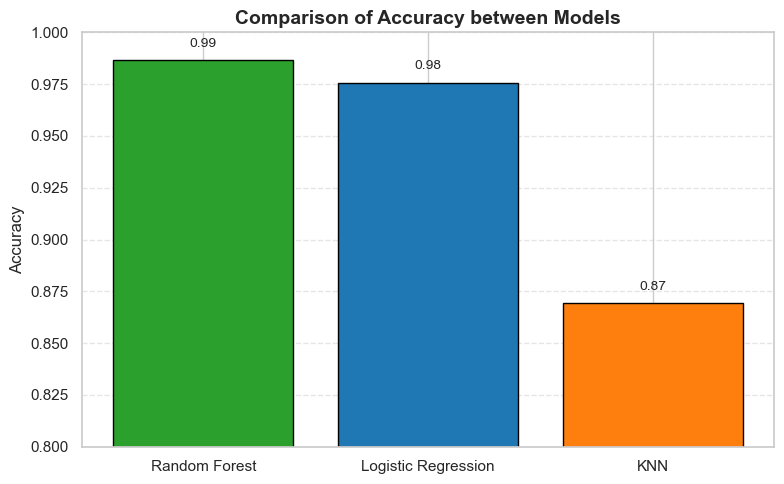

In [164]:
import matplotlib.pyplot as plt

model_names = ['Random Forest', 'Logistic Regression', 'KNN']
accuracies = [accuracy_rf, accuracy_lr, accuracy_knn]
colors = ['#2ca02c', '#1f77b4', '#ff7f0e']  # verde, azul, naranja

plt.figure(figsize=(8, 5))
bars = plt.bar(model_names, accuracies, color=colors, edgecolor='black')


for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.005,
             f'{acc:.2f}', ha='center', va='bottom', fontsize=10)

plt.ylim(0.80, 1.0)
plt.title("Comparison of Accuracy between Models", fontsize=14, fontweight='bold')
plt.ylabel("Accuracy", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### Comparison of Classification Models

This chart compares the performance of three classification models: Random Forest, Logistic Regression, and K-Nearest Neighbors (KNN), using four key metrics:

Accuracy (blue bar) measures the total percentage of correct predictions.Random Forest and Logistic Regression have a very high accuracy (~0.98).

KNN has a lower accuracy (~0.91), indicating that it makes more errors when classifying flights.

Class 1 Precision (orange bar) Of all the flights that the model predicted as delayed, how many were actually delayed?
All models have high accuracy for class 1, but KNN stands out here (~0.98), indicating that it is very good at predicting delays without making mistakes.

Recall Class 1 (green bar) Of all the flights that were actually delayed, how many did the model detect? Random Forest and Logistic Regression correctly detect the majority (~0.98).

KNN has a lower recall (~0.84), which indicates that it lets more flights that were delayed pass through.

F1-Score Class 1 (red bar) is the balance between precision and recall. Ideal for evaluating models on imbalanced data. Again, Random Forest and Logistic Regression have a very high F1-Score (~0.98).

KNN has a lower F1 (~0.90), which reflects its imbalance between high precision and low recall.

Random Forest and Logistic Regression have superior and balanced performance across all metrics.

KNN is useful for certain local patterns, but it has lower recall, so it may not detect some delayed flights.



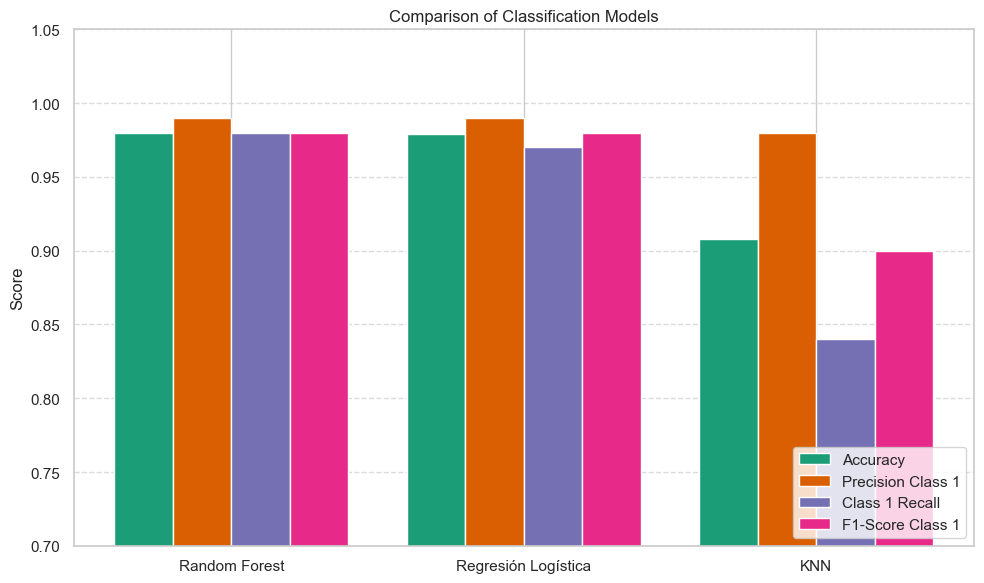

In [167]:

import matplotlib.pyplot as plt
import numpy as np

# Comparison data (approximate values based on previous results)
models = ['Random Forest', 'Regresión Logística', 'KNN']
accuracy = [0.98, 0.9789, 0.908]
precision = [0.99, 0.99, 0.98]
recall = [0.98, 0.97, 0.84]
f1_score = [0.98, 0.98, 0.90]


x = np.arange(len(models))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - 1.5*width, accuracy, width, label='Accuracy')
bars2 = ax.bar(x - 0.5*width, precision, width, label='Precision Class 1')
bars3 = ax.bar(x + 0.5*width, recall, width, label='Class 1 Recall')
bars4 = ax.bar(x + 1.5*width, f1_score, width, label='F1-Score Class 1')


ax.set_ylabel('Score')
ax.set_title('Comparison of Classification Models')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.set_ylim(0.7, 1.05)
ax.legend(loc='lower right')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Conclusions: 

This study provides a detailed and structured view of the causes and dynamics behind delays in commercial flights, using historical data and advanced analysis and predictive modeling techniques. The analysis concludes by showing that delays related to previous aircraft are also the longest lasting. Delays caused by airlines (carrier_delay) and the national system (nas_delay) also have significant durations.

The results highlight the importance of addressing delays related to previous aircraft, as these are not only the most common, but also the longest. Also, improving operational management, optimizing routes and strategically planning schedules could mitigate the most frequent delays and their financial and reputational impacts.

For the impact on the business, it is understood that being able to predict delays greater than 15 minutes allows airlines to anticipate, redistribute resources, communicate these delays to passengers in advance, and mainly make operational decisions. From these measures, economic losses can be avoided, waiting times or downtime can be reduced, as well as an improvement in reputation and customer satisfaction.

In summary, this analysis allowed us to understand the main causes of delays, as well as having a basis for implementing strategies for route optimization.


#### Future recommendations:

With accurate predictions of potential delays, the airline can:
Reschedule crew and aircraft rotations in advance, minimizing disruption.
Optimize gate assignments and turnaround times, especially at high-traffic airports.
Prioritize maintenance or inspections for aircraft likely to be involved in delay-prone routes.
This enhances day-to-day efficiency and reduces the domino effect of a delayed flight impacting subsequent legs.

Customer Satisfaction : Delays are a major cause of customer dissatisfaction. By anticipating them:
Real-time notifications and rebooking options can be provided to passengers.
The airline can offer compensations or services proactively, reducing frustration.
A better on-time performance record strengthens brand trust and loyalty.

Cost Reduction
Flight delays often result in:
Extra fuel consumption (due to holding patterns or rerouting).
Increased personnel costs (ground and air crews on overtime).
Compensation and accommodation costs for affected passengers.
Predictive insights allow the airline to preemptively reduce these costs, making operations more sustainable and economically viable.

Strategic Route Optimization
Using the delay prediction outputs, the airline can:
Identify underperforming routes or time slots.
Redesign or reschedule flights to maximize punctuality.
Invest in infrastructure or technology at specific airports where delays are frequent.
This ensures that resources are allocated intelligently to maximize profitability and service quality.

Policy and Long-Term Planning
At a strategic level, these models empower decision-makers to:
Evaluate the impact of external factors like weather, traffic congestion, or airport infrastructure on delays.
Create data-driven contingency plans for high-risk periods (e.g., holidays, bad weather).
Collaborate more effectively with airports and regulatory agencies by sharing predictive insights.


#### References:

Bureau of Transportation Statistics (2024) Understanding the reporting of causes of flight delays and cancellations. Available at: https://www.bts.gov/topics/airlines-and-airports/understanding-reporting-causes-flight-delays-and-cancellations#q1 (Accessed: 01 May 2025).

GitHub (n.d.) Caso-proposal repository. Available at: https://github.com/Mariferq05/Caso-proposal/commits/main

OpenAI (2023) ChatGPT (Mar 14 version) [Large language model]. Available at: https://chatgpt.com/share/6713ac1e-146c-8010-99d8-92db0e4ce236 and https://chatgpt.com/share/671d2884-57b0-8010-8f06-8f90c26c3fe8

U.S. Department of Transportation (2024) August 2024 Air Travel Consumer Report. Available at: https://www.transportation.gov/resources/individuals/aviation-consumer-protection/august-2024-air-travel-consumer-report (Accessed: 5 May 2025).


(n.d.) Cross-Validation for Machine Learning Models. Unpublished class material. http://localhost:8888/notebooks/Downloads/MACHINE%20LEARNING/Cross-Validation%20for%20ML%20models/Cross-Validation%20for%20Machine%20Learning%20Models.ipynb?

(n.d.) Cross Validation - Class Example. Unpublished class material. http://localhost:8888/notebooks/Downloads/STRATEGIC%20THINKING/SEMESTER%202/Cross%20Validation-ClassExample.ipynb?

(n.d.) Classification and Regression. Unpublished class material. http://localhost:8888/edit/OneDrive/Downloads/MACHINE%20LEARNING/Lecture%202%20-%20Classification%20and%20Regression.pdf
file:///C:/Users/mrgra/Downloads/STRATEGIC%20THINKING/Lecture%202%20-%20Classification%20and%20Regression.pdf

(n.d.) Illustrating Information Leakage Example. Unpublished class material. http://localhost:8888/notebooks/Downloads/STRATEGIC%20THINKING/SEMESTER%202/Illustrating_Information_Leakage_Example.ipynb?


(n.d.) Pipelines in Machine Learning. Unpublished class material.http://localhost:8888/notebooks/Downloads/STRATEGIC%20THINKING/SEMESTER%202/Pipelines%20In%20Machine%20Learning.ipynb?

(n.d.) Random Forest – Practical. Unpublished class material. http://localhost:8888/notebooks/Downloads/MACHINE%20LEARNING/Random%20Forest/Random%20Forest%20-%20Practical.ipynb 

(n.d) Regression case study. Unpublished class material.
https://moodle.cct.ie/pluginfile.php/69823/mod_resource/content/0/Regression%20Case%20Study.pdf

(n.d) The essential guide to AI training data.
file:///C:/Users/mrgra/Downloads/STRATEGIC%20THINKING/The%20Essential%20Guide%20To%20AI%20Training%20Data.pdf

(n.d.) Week 5 - Model Comparison. Unpublished class material.  http://localhost:8888/notebooks/Downloads/STRATEGIC%20THINKING/SEMESTER%202/Week%205%20-%20Model%20Comparison.ipynb?




